<a href="https://colab.research.google.com/github/AbiramiMuthu/TensorFlow-CNN-Dogs-Vs-Cats-Kaggle/blob/main/TF_Dogs_vs_Cats_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading a Dataset from Kaggle to colab using API token

### Download the API token file it will be kaggle.json

### upload that kaggle.json file in colab

#### create a folder .Kaggle and place the file in that folder

#### There will be a link available under Data folder of a chosen competition in kaggle ,copy and paste it 

#### The file will be in the left files pane

In [ ]:
!pip install -q kaggle


In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c dogs-vs-cats

 97% 529M/543M [00:03<00:00, 169MB/s]
100% 543M/543M [00:03<00:00, 172MB/s]
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 148MB/s]
 96% 259M/271M [00:01<00:00, 169MB/s]
100% 271M/271M [00:01<00:00, 172MB/s]


### The images are not structured in kaggle train folder has both dogs and cats images. we need a structured datset so i am dowloading a structured dogs vs cats dataset from the below github link

In [ ]:
!git clone https://github.com/laxmimerit/dog-cat-full-dataset.git

Cloning into 'dog-cat-full-dataset'...
remote: Enumerating objects: 25027, done.
remote: Total 25027 (delta 0), reused 0 (delta 0), pack-reused 25027
Receiving objects: 100% (25027/25027), 541.62 MiB | 34.68 MiB/s, done.
Resolving deltas: 100% (5/5), done.
Checking out files: 100% (25001/25001), done.


### Change the Edit-->Notebook settings ----> choose TPU

### Import libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPool2D,Dropout,BatchNormalization,ZeroPadding2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train_data_dir="/content/dog-cat-full-dataset/data/train"
test_data_dir="/content/dog-cat-full-dataset/data/test"

In [ ]:
#size of the image is large we can set to 32,32 for simple purposes

img_width=32
img_height=32
batch_size=20

######  Our original images consist in RGB coefficients in the 0-255, but such values would be too high for our model to process (given a typical learning rate), so we target values between 0 and 1 instead by scaling with a 1/255

In [ ]:
#Generate batches of tensor image data
datagen =ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator=datagen.flow_from_directory(train_data_dir,target_size=(img_width,img_height),
                                            classes=["dogs","cats"],class_mode='binary',batch_size=batch_size)

Found 20000 images belonging to 2 classes.


In [ ]:
validation_generator=datagen.flow_from_directory(test_data_dir,target_size=(img_width,img_height),
                                            classes=["dogs","cats"],class_mode='binary',batch_size=batch_size)

Found 5000 images belonging to 2 classes.


In [ ]:
# len*20 bcoz each each batch has 20
len(train_generator)

1000

In [ ]:
len(validation_generator)

250

## Build the CNN Model

In [ ]:
model=Sequential()
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer='he_uniform',input_shape=(img_width,img_height,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
opt=SGD(learning_rate=0.01,momentum=0.9)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#since using DataGenerator we use fit_generator
# steps_per_epoch: Total number of steps (batches of samples) to yield from generator before declaring one epoch finished and starting the next epoch. It should typically be equal to the number of unique samples of your dataset divided by the batch size.
history=model.fit_generator(train_generator,steps_per_epoch=len(train_generator),epochs=5,validation_data=validation_generator,validation_steps=len(validation_generator),verbose=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
1000/1000 [==============================] - 104s 103ms/step - loss: 0.6949 - accuracy: 0.5150 - val_loss: 0.6703 - val_accuracy: 0.5816
Epoch 2/5
1000/1000 [==============================] - 100s 100ms/step - loss: 0.6901 - accuracy: 0.5252 - val_loss: 0.6895 - val_accuracy: 0.5132
Epoch 3/5
1000/1000 [==============================] - 102s 102ms/step - loss: 0.6179 - accuracy: 0.6554 - val_loss: 0.5540 - val_accuracy: 0.7220
Epoch 4/5
1000/1000 [==============================] - 107s 107ms/step - loss: 0.5350 - accuracy: 0.7351 - val_loss: 0.5203 - val_accuracy: 0.7336
Epoch 5/5
1000/1000 [==============================] - 107s 107ms/step - loss: 0.4963 - accuracy: 0.7597 - val_loss: 0.5271 - val_accuracy: 0.7360


In [ ]:
history.history

{'accuracy': [0.5150499939918518,
  0.5251500010490417,
  0.6553999781608582,
  0.7351499795913696,
  0.7597000002861023],
 'loss': [0.6949349641799927,
  0.6900608539581299,
  0.6179431676864624,
  0.5349929928779602,
  0.4963231086730957],
 'val_accuracy': [0.58160001039505,
  0.5131999850273132,
  0.722000002861023,
  0.7336000204086304,
  0.7360000014305115],
 'val_loss': [0.6702841520309448,
  0.6894854307174683,
  0.553984522819519,
  0.5203025937080383,
  0.5270782709121704]}

In [ ]:
def plot_learningCurve(history,epoch):
  epochrange=range(1,epoch+1)
  plt.plot(epochrange,history.history['accuracy'])
  plt.plot(epochrange,history.history['val_accuracy'])
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.title("Accuracy Curve")
  plt.legend(["train","test"],loc="upper left")
  plt.show()

  plt.plot(epochrange,history.history['loss'])
  plt.plot(epochrange,history.history['val_loss'])
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.title("Loss Curve")
  plt.legend(["train","test"],loc="upper left")
  plt.show()


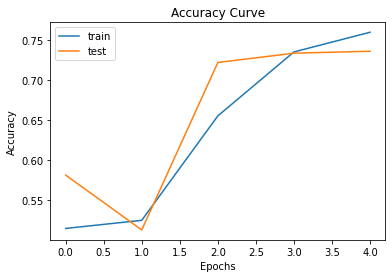

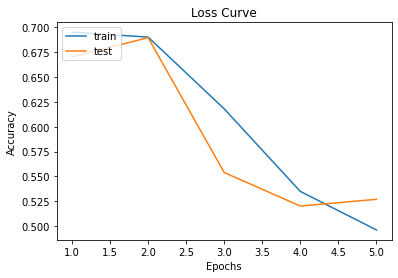

In [ ]:
plot_learningCurve(history,5)

### Using BatchNormalization and Dropout

In [ ]:
model=Sequential()
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer='he_uniform',input_shape=(img_width,img_height,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [ ]:
opt=SGD(learning_rate=0.01,momentum=0.9)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit_generator(train_generator,steps_per_epoch=len(train_generator),epochs=5,validation_data=validation_generator,validation_steps=len(validation_generator),verbose=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
1000/1000 [==============================] - 241s 240ms/step - loss: 0.6924 - accuracy: 0.6187 - val_loss: 0.6495 - val_accuracy: 0.6642
Epoch 2/5
1000/1000 [==============================] - 236s 236ms/step - loss: 0.6220 - accuracy: 0.6692 - val_loss: 0.5375 - val_accuracy: 0.7324
Epoch 3/5
1000/1000 [==============================] - 236s 236ms/step - loss: 0.5642 - accuracy: 0.7135 - val_loss: 0.5706 - val_accuracy: 0.6990
Epoch 4/5
1000/1000 [==============================] - 241s 241ms/step - loss: 0.5393 - accuracy: 0.7345 - val_loss: 0.5107 - val_accuracy: 0.7448
Epoch 5/5
1000/1000 [==============================] - 239s 239ms/step - loss: 0.5076 - accuracy: 0.7545 - val_loss: 0.5122 - val_accuracy: 0.7548


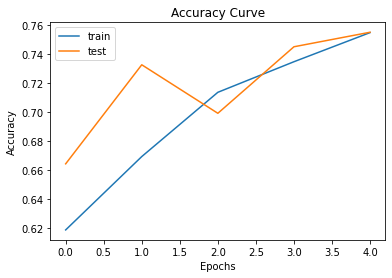

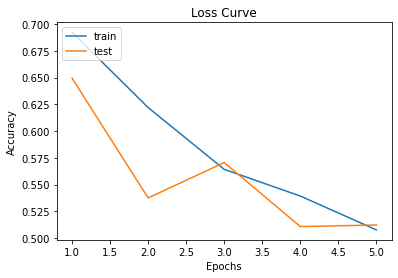

In [ ]:
plot_learningCurve(history,5)